# AA Project 1

## Problem Statement

13 – Find a maximum weight independent set for a given undirected graph G(V, E), whose
vertices carry positive weights, with n vertices and m edges. An independent set of G is a subset
of vertices, no two of which are adjacent. The weight of an independent set is the sum of its
vertices’ weights. A maximum weight independent set is an independent set whose total weight is
as large as possible.

Design and test an exhaustive search algorithm to solve this graph problem, as
well as another method using a greedy heuristic.

## Content

- Initial Remarks and Analysis

- Formal Computational Complexity Analysis

- Sequence of Experiments, where I analyze:
    - Number of Basic Operations
    - Execution Time
    - Number of Solutions/Configurations
    - Precision of the Greedy Heuristic

- Formal and Experimental Comparisons

- Largest Graph Possible

- Execution Time Estimation for Bigger Instances

- Conclusion (Report)

## Initial Remarks and Analysis

### First Thoughts

This problem consists in selecting the maximum amount of vertices in a graph such that no two selected vertices are adjacent. Furthermore, each vertex has a weight, and the goal is to maximize the sum of the weights of the selected vertices.
Right away, this problem seems to be a variation of the Knapsack Problem, where the items are the vertices and the weight of each item is the weight of the vertex. However, the constraints are different, as we cannot select adjacent vertices.

Let's start this work by trying out the NetworkX library, which is a Python library for the creation, manipulation, and study of complex networks. This is useful because I'll be working with graphs, and this library has a lot of built-in functions that can help me with this task.

### NetworkX

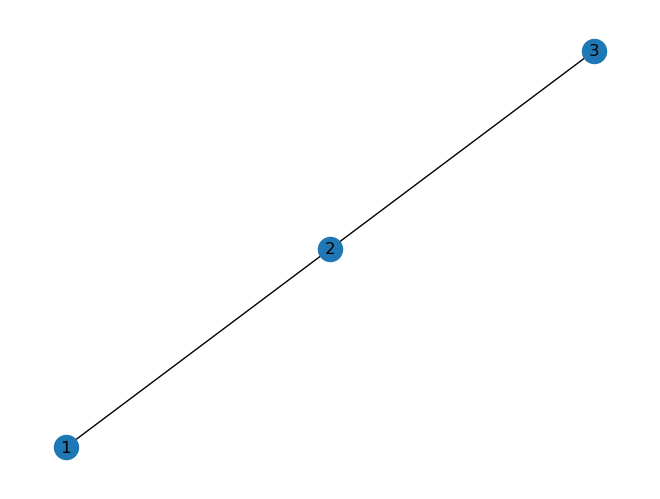

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges
G.add_edge(1, 2)
G.add_edge(2, 3)

# Give weight to the nodes
G.nodes[1]['weight'] = 10
G.nodes[2]['weight'] = 20
G.nodes[3]['weight'] = 30

# Visualize the graph, with weights indicated as labels
nx.draw(G, with_labels=True)


### Graph Creation

I want to test how to procedurally create a graph using NetworkX. I'll start by creating a function that creates a graph with n vertices and m edges.

In [ ]:
# V1 - Create a function that creates a graph with n nodes and m edges
def create_graph_v1(n, m):
    G = nx.Graph()
    for i in range(1, n+1):
        G.add_node(i)
    for i in range(1, m+1):
        G.add_edge(i, i+1)
    return G

# Graph with 3 nodes and 2 edges
G1 = create_graph_v1(3, 2)

plt.figure()
nx.draw(G1, with_labels=True)
plt.show()

In [ ]:
# V2 - Create a function that creates a random graph with n nodes and a value p, that represents the percentage of the total number of possible edges that are present in the graph. Use 108122 as the seed for the random number generator.
def create_graph_v2(n, p):
    G = nx.erdos_renyi_graph(n, p, seed=108122)
    return G

# Graph with 5 nodes and 0.5 percentage
G2 = create_graph_v2(5, 0.8)

plt.figure()
nx.draw(G2, with_labels=True)
plt.show()

In [ ]:
import random

# V3 - Same as V2, but the nodes should have a weight attribute, with a random value between 1 and 100
def create_graph_v3(n, p):
    G = nx.erdos_renyi_graph(n, p, seed=108122)
    for i in range(0, n):
        G.nodes[i]['weight'] = random.randint(1, 100)
    return G

# Graph with 20 nodes and n percentage
G3 = create_graph_v3(20, 0.125)

plt.figure()
nx.draw(G3, with_labels=True)
plt.show()

I noticed that graph creation, although simple, takes a lot of time for large graphs. This is a problem, as I want to test the performance of the algorithms I'll implement. Therefore, I'll create a function pre-creates graphs and saves them in a file, so I can load them later.

In [ ]:
from utils import utils

# Create graphs and store them in a file
utils.graph_creation_and_save(1000, 0.125, 5)
utils.graph_creation_and_save(1000, 0.25, 5)
utils.graph_creation_and_save(1000, 0.50, 5)
utils.graph_creation_and_save(1000, 0.75, 5)

### Exhaustive Search - First Approach

I'll start by implementing an exhaustive search algorithm to solve this problem. This algorithm will generate all possible subsets of independent vertices and select the one with the maximum total weight.

#### Formal Analysis

For a graph with n nodes, there are 2^n possible subsets of vertices. Therefore, the computational complexity of this algorithm is O(2^n).

n = 1 -> {}, {1} -> 2^1 = 2
n = 2 -> {}, {1}, {2}, {1, 2} -> 2^2 = 4
n = 3 -> {}, {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3} -> 2^3 = 8
...

However, we can optimize this algorithm by using backtracking and pruning. This way, we can avoid generating all possible subsets, and the algorithm will be more efficient.
For that, each chosen node will create a branch, and the algorithm will explore this branch until it reaches a solution or a dead-end. If it reaches a dead-end, it will backtrack and explore another branch.

In [ ]:
import networkx as nx

# Import utils from the file './utils.py'
from utils import utils
from algorithms import algorithms

# Assuming create_graph_v3 is defined
G4 = utils.create_graph_v4(5, 0.5)

# Visualize the graph, with weights indicated as labels
#plt.figure()
#nx.draw(G4, with_labels=True)
#plt.show()

# Print the weights of the nodes
utils.graph_print(G4)

# Print the maximum independent set and its weight
max_set, ops = algorithms.exhaustive_v1(G4)
print("Maximum independent set:", max_set)
max_weight = sum([G4.nodes[node]['weight'] for node in max_set])
print("Maximum independent set weight:", max_weight)


The function above seems good, but it generates all possible subsets of the vertices, which is not efficient. Let's stress test this function to see how it behaves as the number of vertices increases.

In [1]:
from utils import utils
from algorithms import algorithms

# Stress test for the exhaustive_v1 algorithm
utils.full_stress_test(algorithms.exhaustive_v1, base_filename="exhaustive_v1", max_time_minutes=1, stored_graphs=False, sample_size=1)

Starting stress test for p = 0.125
  P  | n | No of Operations | Solution | Time (s) 
0.125|  1|                  2 | (0,) | 0.0 
0.125|  2|                  9 | (1,) | 0.0 
0.125|  3|                 33 | (1, 2) | 0.0 
0.125|  4|                104 | (1, 2, 3) | 0.0 
0.125|  5|                300 | (1, 2, 3, 4) | 0.0 
0.125|  6|                771 | (1, 2, 3) | 0.0 
0.125|  7|               1988 | (1, 2, 3, 6) | 0.0 
0.125|  8|               5064 | (0, 3, 4, 6, 7) | 0.0010008811950683594 
0.125|  9|              12420 | (0, 3, 4, 6, 7, 8) | 0.002004861831665039 
0.125| 10|              29672 | (0, 2, 3, 6, 7, 8) | 0.002995729446411133 
0.125| 11|              70226 | (1, 3, 7, 8, 10) | 0.004998683929443359 
0.125| 12|             164576 | (0, 2, 3, 7, 10) | 0.011003971099853516 
0.125| 13|             382304 | (0, 3, 8, 10, 11, 12) | 0.01999688148498535 
0.125| 14|             879019 | (1, 3, 5, 7, 9, 10, 13) | 0.04200601577758789 
0.125| 15|            2002723 | (6, 7, 8, 9, 10, 13, 

As it can be seen by the results above, the times are increasing exponentially. We can deduce by the values that the time complexity of this algorithm is O(2^n), which is really bad. This is expected, as the algorithm generates all possible subsets of the vertices, which is a lot of combinations.

The next step is to try and improve the exhaustive search algorithm to be more efficient, as it will be used later to compare and determine the precision of the greedy heuristic.

But how can we improve this algorithm? For that, I will use an [article from 2024](https://dl.acm.org/doi/10.1145/3618260.3649791) that presents a new algorithm for the Maximum Independent Set problem.

In [ ]:
from utils import utils
from algorithms import algorithms

# Stress test for the exhaustive_v2 algorithm
utils.full_stress_test(algorithms.exhaustive_v2, base_filename="exhaustive_v2", max_time_minutes=1, stored_graphs=False, sample_size=1)

In [ ]:
# Didn't have time to read the whole article and implement the algorithm

In [ ]:
# Compare the results of the 2 versions of the exhaustive algorithm

import pandas as pd

df1 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_125.csv")
df2 = pd.read_csv("./stress_tests/exhaustive_v2/exhaustive_v2_p_125.csv")

# Compare the solutions for the first 28 graphs and see if they match
for i in range(28):
    if df1['Solution'][i] != df2['Solution'][i]:
        print("Graph", i, "does not match")
    else:
        print("Graph", i, "matches")


# Compare the time taken and the number of operations (in separate plots) for the first 25 graphs
plt.figure()
df1['Execution Time (seconds)'].head(25).plot(label='Exhaustive V1')
df2['Execution Time (seconds)'].head(25).plot(label='Exhaustive V2')
plt.legend()
plt.xlabel('Graph Number')
plt.ylabel('Time (s)')
plt.title('Comparison of Time Taken for First 25 Graphs')
plt.show()

plt.figure()
df1['Number of Operations'].head(25).plot(label='Exhaustive V1')
df2['Number of Operations'].head(25).plot(label='Exhaustive V2')
plt.legend()
plt.xlabel('Graph Number')
plt.ylabel('Operations')
plt.title('Comparison of Operations for First 25 Graphs')
plt.show()

### Greedy Heuristic - First Approach

The exhaustive search algorithm is not efficient, so the next step is to try and implement a greedy heuristic to solve this problem.

#### Biggest Weight First

The first greedy heuristic I'll implement is to select the vertex with the biggest weight first. This is a simple heuristic, but it might work well for this problem.

In [ ]:
from utils import utils

def biggest_weight_first_v1(G):
    max_weight = 0
    max_set = set()
    nodes = sorted(G.nodes, key=lambda x: G.nodes[x]['weight'], reverse=True)
    for node in nodes:
        if utils.is_independent_set(G, max_set.union({node})):
            max_set.add(node)
    return max_set

G5 = create_graph_v3(5, 0.5)

# Visualize the graph, with weights indicated as labels
plt.figure()
nx.draw(G5, with_labels=True)
plt.show()

# Print the weights of the nodes
utils.graph_print(G5)

# Print the maximum independent set and its weight
max_set = biggest_weight_first_v1(G5)
print("Maximum independent set:", max_set)
max_weight = sum([G5.nodes[node]['weight'] for node in max_set])
print("Maximum independent set weight:", max_weight)


In [ ]:
from utils import utils

# Stress test
utils.full_stress_test(biggest_weight_first_v1, base_filename="biggest_weight_first_v1", max_time_minutes=1, p_values=[0.125])

In [ ]:
# Load the file using pandas, and visualize the results (x-axis: number of nodes, y-axis: time in seconds)
import pandas as pd

df1 = pd.read_csv("./stress_tests/biggest_weight_first_v1/biggest_weight_first_v1_p_125.csv")

plt.figure()
plt.plot(df1['Node Count'], df1['Execution Time (seconds)'])
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.title("Biggest Weight First V1")
# Plot y=x line for reference
plt.plot(df1['Node Count'], df1['Node Count']/50000, linestyle='dashed')
plt.show()

0       2
1       4
2       8
3      16
4      32
       ..
155     0
156     0
157     0
158     0
159     0
Name: Node Count, Length: 160, dtype: int64


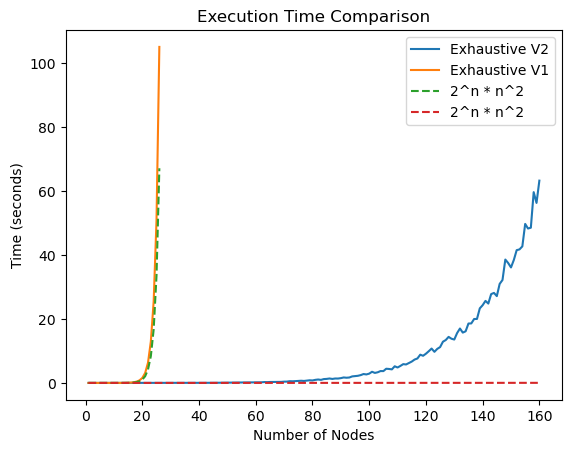

In [73]:
# Load the file using pandas, and visualize the results (x-axis: number of nodes, y-axis: time in seconds)
import pandas as pd

df1 = pd.read_csv("./stress_tests/exhaustive_v2/exhaustive_v2_p_50.csv")
df2 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_50.csv")
abc = 2
plt.figure()
plt.plot(df1['Node Count'], df1['Execution Time (seconds)'], label='Exhaustive V2')
plt.plot(df2['Node Count'], df2['Execution Time (seconds)'], label='Exhaustive V1')
# Plot the time complexity of the exhaustive_v1 algorithm (y = 2^n * n^2), scaled to fit the graph
print(abc ** df1['Node Count'])
plt.plot(df2['Node Count'], (abc**df2['Node Count']) / 1000000, linestyle='dashed', label='2^n * n^2')
plt.plot(df1['Node Count'], (df1['Node Count']**2) / 1000000, linestyle='dashed', label='2^n * n^2')
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.title("Execution Time Comparison")
plt.legend()
plt.show()

In [2]:
from utils import utils

utils.graph_creation_and_save(3500, 0.125, 100, file_name="big_graph_125")
utils.graph_creation_and_save(3500, 0.25, 100, file_name="big_graph_25")
utils.graph_creation_and_save(3500, 0.50, 100, file_name="big_graph_50")
utils.graph_creation_and_save(3500, 0.75, 100, file_name="big_graph_75")

Generating graph for size 100...
Generating graph for size 200...
Generating graph for size 300...
Generating graph for size 400...
Generating graph for size 500...
Generating graph for size 600...
Generating graph for size 700...
Generating graph for size 800...
Generating graph for size 900...
Generating graph for size 1000...
Generating graph for size 1100...
Generating graph for size 1200...
Generating graph for size 1300...
Generating graph for size 1400...
Generating graph for size 1500...
Generating graph for size 1600...
Generating graph for size 1700...
Generating graph for size 1800...
Generating graph for size 1900...
Generating graph for size 2000...
Generating graph for size 2100...
Generating graph for size 2200...
Generating graph for size 2300...
Generating graph for size 2400...
Generating graph for size 2500...
Generating graph for size 2600...
Generating graph for size 2700...
Generating graph for size 2800...
Generating graph for size 2900...
Generating graph for si

'graphs\\big_graph_75_p_0.75.pkl'

In [5]:
from utils import utils

# Load the graph from the file
G = utils.load_graphs("graphs/big_graph_125_p_0.125.pkl")
# Check the length of the graph
print(len(G))

200


TypeError: cannot convert the series to <class 'float'>

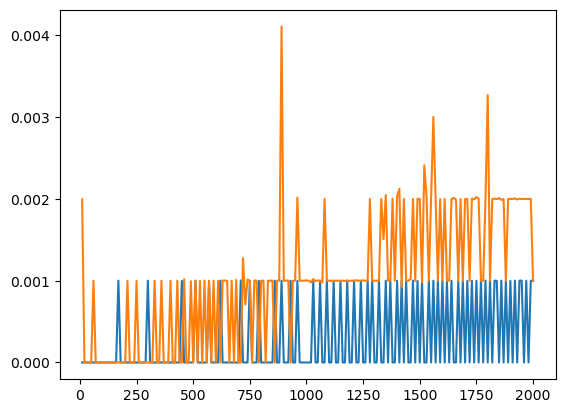

In [75]:
# Load the file using pandas, and visualize the results (x-axis: number of nodes, y-axis: time in seconds)
import pandas as pd
import math

df1 = pd.read_csv("./stress_tests/biggest_weight_first_v2/biggest_weight_first_v2_p_125.csv")
df2 = pd.read_csv("./stress_tests/smallest_degree_first_v1/smallest_degree_first_v1_p_125.csv")
abc = 2
plt.figure()
plt.plot(df1['Node Count'], df1['Execution Time (seconds)'], label='Biggest Weight First')
plt.plot(df2['Node Count'], df2['Execution Time (seconds)'], label='Smallest Degree First')
# Plot the time complexity of the heuristic algorithms (y = nlog n), scaled to fit the graph
plt.plot(df1['Node Count'], (df1['Node Count'] * math.log(df1['Node Count'])) / 1000000, linestyle='dashed', label='nlog n')
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.title("Execution Time Comparison")
plt.legend()
plt.show()

In [29]:
df1 = pd.read_csv("./stress_tests/exhaustive_v2/exhaustive_v2_p_50.csv")
operations = df1['Number of Operations']

# Check the ratio of growth of the number of operations
growth_ratio = operations.diff().shift(-1) / operations.diff() 
print(growth_ratio)

0            NaN
1       1.500000
2       1.333333
3       2.750000
4       0.909091
         ...    
155    -0.348868
156    18.305708
157    -0.469237
158    -1.067340
159          NaN
Name: Number of Operations, Length: 160, dtype: float64


In [1]:
from utils import utils
from algorithms import algorithms

# Stress test
utils.full_stress_test(algorithms.biggest_weight_first_v2, base_filename="biggest_weight_first_v2", max_time_minutes=1, stored_graphs=True, sample_size=100)

Starting stress test for p = 0.125
  n  | No of Operations | Total Weight | Time (s) | Solution 
 100 |              707 |         1344 | 0.001999 | {1, 10, 11, 13, 25, 30, 33, 35, 40, 44, 50, 56, 57, 63, 66, 70, 74, 77, 88, 93, 97} 
 200 |             1573 |         1753 | 0.001004 | {130, 10, 138, 140, 139, 16, 152, 25, 163, 168, 172, 179, 52, 56, 63, 77, 83, 96, 97, 100, 104, 119} 
 300 |             2525 |         2166 | 0.000000 | {7, 136, 10, 140, 143, 273, 152, 31, 290, 166, 294, 296, 168, 171, 48, 51, 53, 55, 56, 58, 63, 203, 77, 218, 232, 237, 113, 119} 
 400 |             3518 |         2429 | 0.000997 | {128, 10, 138, 140, 271, 273, 147, 152, 283, 29, 286, 36, 166, 296, 51, 56, 60, 70, 327, 201, 77, 214, 93, 351, 361, 108, 242, 376, 378, 383} 
 500 |             4553 |         2661 | 0.000998 | {128, 262, 10, 138, 272, 273, 23, 152, 422, 166, 296, 426, 433, 53, 439, 317, 62, 63, 447, 323, 324, 70, 76, 332, 211, 340, 348, 93, 221, 361, 113, 242, 125, 119, 381} 
 600 |        

As we can see by the results above, the greedy heuristic is much faster than the exhaustive search algorithm. However, the greedy heuristic is not optimal, as it does not guarantee the maximum weight independent set. Let's analyze the precision of the greedy heuristic by comparing it to the exhaustive search algorithm.

In [ ]:
from utils import utils
from algorithms import algorithms

# Stress test
utils.full_stress_test(algorithms.smallest_degree_first_v1, base_filename="smallest_degree_first_v1", max_time_minutes=1, p_values=[0.125])

### 

In [ ]:
from utils import utils
from algorithms import algorithms

# Stress test
utils.full_stress_test(algorithms.weight_to_degree_v1, base_filename="weight_to_degree_v1", max_time_minutes=1, p_values=[0.125])

## Full Stress Test For Every **Algorithm**

In [2]:
from utils import utils
from algorithms import algorithms

utils.full_stress_test(algorithms.exhaustive_v2, base_filename="exhaustive", max_time_minutes=0.65, stored_graphs=False, sample_size=1)

Starting stress test for p = 0.125
  n  | No of Operations | Total Weight | Time (s) | Solution 
   1 |                1 |           15 | 0.000000 | {0} 
   2 |                3 |           52 | 0.000000 | {1} 
   3 |                6 |           86 | 0.000000 | {1, 2} 
   4 |               12 |          159 | 0.000000 | {1, 2, 3} 
   5 |               24 |          179 | 0.000000 | {1, 2, 3, 4} 
   6 |               42 |          159 | 0.000000 | {1, 2, 3} 
   7 |               72 |          221 | 0.000000 | {1, 2, 3, 6} 
   8 |              129 |          248 | 0.001003 | {0, 3, 4, 6, 7} 
   9 |              288 |          282 | 0.000997 | {0, 3, 4, 6, 7, 8} 
  10 |              388 |          296 | 0.001005 | {0, 2, 3, 6, 7, 8} 
  11 |              567 |          337 | 0.001994 | {1, 3, 7, 8, 10} 
  12 |              776 |          300 | 0.002000 | {0, 2, 3, 7, 10} 
  13 |             1112 |          326 | 0.003000 | {0, 3, 8, 10, 11, 12} 
  14 |             1600 |          474 | 0.

In [ ]:
from utils import utils
from algorithms import algorithms

# Exhausive V2 (Just Exhaustive)
utils.full_stress_test(algorithms.exhaustive_v2, base_filename="exhaustive", max_time_minutes=1, stored_graphs=False, sample_size=1)

# Smaller Greedy Tests, For Comparing With Exhaustive
utils.full_stress_test(algorithms.biggest_weight_first_v2, base_filename="biggest_weight_first_compare", n_max=800, stored_graphs=False, sample_size=1)
utils.full_stress_test(algorithms.smallest_degree_first_v1, base_filename="smallest_degree_first_compare", n_max=800, stored_graphs=False, sample_size=1)
utils.full_stress_test(algorithms.weight_to_degree_v1, base_filename="weight_to_degree_compare", n_max=800, stored_graphs=False, sample_size=1)

# Normal Greedy Tests
utils.full_stress_test(algorithms.biggest_weight_first_v2, base_filename="biggest_weight_first", stored_graphs=True, sample_size=100)
utils.full_stress_test(algorithms.smallest_degree_first_v1, base_filename="smallest_degree_first", stored_graphs=True, sample_size=100)
utils.full_stress_test(algorithms.weight_to_degree_v1, base_filename="weight_to_degree", stored_graphs=True, sample_size=100)

Starting stress test for p = 0.75
  n  | No of Operations | Total Weight | Time (s) | Solution 
   1 |                1 |           15 | 0.000000 | {0} 
   2 |                3 |           52 | 0.000000 | {1} 
   3 |                6 |           52 | 0.000000 | {1} 
   4 |               10 |          125 | 0.000000 | {1, 3} 
   5 |               20 |          159 | 0.000000 | {1, 2, 3} 
   6 |               25 |           86 | 0.000000 | {1, 2} 
   7 |               39 |          145 | 0.000000 | {1, 3, 4} 
   8 |               52 |          125 | 0.000000 | {1, 3} 
   9 |               67 |          135 | 0.000000 | {3, 6} 
  10 |               66 |          140 | 0.000000 | {6, 7} 
  11 |               88 |          140 | 0.000000 | {0, 9, 6} 
  12 |              125 |          178 | 0.000000 | {10, 7} 
  13 |              151 |          196 | 0.000000 | {8, 10, 6} 
  14 |              196 |          203 | 0.000000 | {9, 10, 12} 
  15 |              241 |          176 | 0.000999 | {8

## Algorithm Comparison

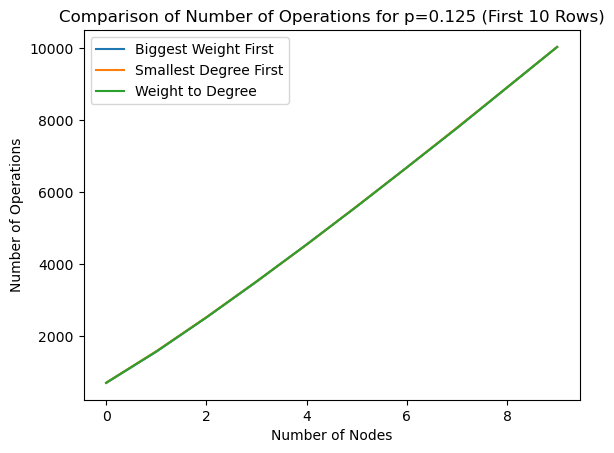

In [8]:
# Make 4 plots, one for each p value, and compare the 3 greedy algorithms
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv("./stress_tests/biggest_weight_first/biggest_weight_first_p_125.csv")
df3 = pd.read_csv("./stress_tests/smallest_degree_first/smallest_degree_first_p_125.csv")
df4 = pd.read_csv("./stress_tests/weight_to_degree/weight_to_degree_p_125.csv")

# Plot only a small subset (first 10 rows)
plt.figure()
df2['Number of Operations'].head(10).plot(label='Biggest Weight First')
df3['Number of Operations'].head(10).plot(label='Smallest Degree First')
df4['Number of Operations'].head(10).plot(label='Weight to Degree')
plt.legend()
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Operations')
plt.title('Comparison of Number of Operations for p=0.125 (First 10 Rows)')
plt.show()


## Exhaustive V1 and V2 Comparison - Time

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# Read data for all graph sizes
df_v1_125 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_125.csv")
df_v1_25 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_25.csv")
df_v1_50 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_50.csv")
df_v1_75 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_75.csv")

df_v1 = {
    125: df_v1_125,
    25: df_v1_25,
    50: df_v1_50,
    75: df_v1_75
}

df_v2_125 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_125.csv")
df_v2_25 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_25.csv")
df_v2_50 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_50.csv")
df_v2_75 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_75.csv")

df_v2 = {
    125: df_v2_125,
    25: df_v2_25,
    50: df_v2_50,
    75: df_v2_75
}

k_values = [125, 25, 50, 75]  # Use actual values

# Extract data for execution times by graph size and k
algorithm1_times = {k: df_v1[k]['Execution Time (seconds)'].to_list() for k in k_values}
algorithm2_times = {k: df_v2[k]['Execution Time (seconds)'].to_list() for k in k_values}

# Determine the maximum graph size across all k values
max_graph_size_v1 = max(len(times) for times in algorithm1_times.values())
max_graph_size_v2 = max(len(times) for times in algorithm2_times.values())

# Function to calculate the mean with available data
def calculate_mean(times_dict, graph_size):
    values = [times[graph_size] for times in times_dict.values() if graph_size < len(times)]
    return np.mean(values) if values else np.nan

# Calculate the average execution time for each graph size across the k values
avg_algorithm1_times = [calculate_mean(algorithm1_times, i) for i in range(max_graph_size_v1)]
avg_algorithm2_times = [calculate_mean(algorithm2_times, i) for i in range(max_graph_size_v2)]

# Plot Execution Time as a line graph
plt.figure(figsize=(12, 6))

# Colors for distinguishing lines
colors = matplotlib.colormaps["tab10"]

# Plot average execution times for both algorithms
plt.plot(range(max_graph_size_v1), avg_algorithm1_times, marker='o', color=colors(0), linestyle='-', linewidth=1.5, label='Exhaustive V1')
plt.plot(range(max_graph_size_v2), avg_algorithm2_times, marker='s', color=colors(3), linestyle='--', linewidth=1.5, label='Exhaustive V2')

# Set labels and legend for Execution Time plot
plt.xlabel('Graph Size (|V|)')
plt.ylabel('Execution Time (s)')
plt.title('Average Execution Time by Graph Size (for k in [12.5, 25, 50, 75])')

# Use logarithmic scale for y-axis
plt.yscale('log')

# Adjust legend to stay inside the plot
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize='small')

# Layout adjustments
plt.tight_layout()

# Save the plot
plt.savefig('./images/execution_time_comparison_average.png', dpi=300)
plt.close()


## Exhaustive V1 and V2 Comparison - Operations

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# Read data for all graph sizes
df_v1_125 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_125.csv")
df_v1_25 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_25.csv")
df_v1_50 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_50.csv")
df_v1_75 = pd.read_csv("./stress_tests/exhaustive_v1/exhaustive_v1_p_75.csv")

df_v1 = {
    125: df_v1_125,
    25: df_v1_25,
    50: df_v1_50,
    75: df_v1_75
}

df_v2_125 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_125.csv")
df_v2_25 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_25.csv")
df_v2_50 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_50.csv")
df_v2_75 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_75.csv")

df_v2 = {
    125: df_v2_125,
    25: df_v2_25,
    50: df_v2_50,
    75: df_v2_75
}

k_values = [125, 25, 50, 75]  # Use actual values

# Extract data for number of operations by graph size and k
algorithm1_ops = {k: df_v1[k]['Number of Operations'] for k in k_values}
algorithm2_ops = {k: df_v2[k]['Number of Operations'] for k in k_values}

# Find the maximum graph size across all k values
max_graph_size_v1 = max(len(ops) for ops in algorithm1_ops.values())
max_graph_size_v2 = max(len(ops) for ops in algorithm2_ops.values())

# Function to calculate the mean with available data
def calculate_mean(ops_dict, graph_size):
    values = [ops[graph_size] for ops in ops_dict.values() if graph_size < len(ops)]
    return np.mean(values) if values else np.nan

# Calculate the average number of operations for each graph size across the k values
avg_algorithm1_ops = [calculate_mean(algorithm1_ops, i) for i in range(max_graph_size_v1)]
avg_algorithm2_ops = [calculate_mean(algorithm2_ops, i) for i in range(max_graph_size_v2)]

# Plot Execution Time as a line graph
plt.figure(figsize=(12, 6))

# Colors for distinguishing lines
colors = matplotlib.colormaps["tab10"]  # Use the updated method for color mapping

# Plot average execution ops for both algorithms
plt.plot(range(max_graph_size_v1), avg_algorithm1_ops, marker='o', color=colors(0), linestyle='-', linewidth=1.5, label='Exhaustive V1')
plt.plot(range(max_graph_size_v2), avg_algorithm2_ops, marker='s', color=colors(3), linestyle='--', linewidth=1.5, label='Exhaustive V2')

# Set labels and legend for Execution Time plot
plt.xlabel('Graph Size (|V|)')
plt.ylabel('Number of Operations')
plt.title('Average Number of Operations by Graph Size (for k in [12.5, 25, 50, 75])')

# Use logarithmic scale for y-axis
plt.yscale('log')

# Adjust legend to stay inside the plot
plt.legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize='small')

# Layout adjustments
plt.tight_layout()

# Save the plot
plt.savefig('./images/number_of_operations_comparison_average.png', dpi=300)
plt.close()

## Remarks - Solution Size and Weight

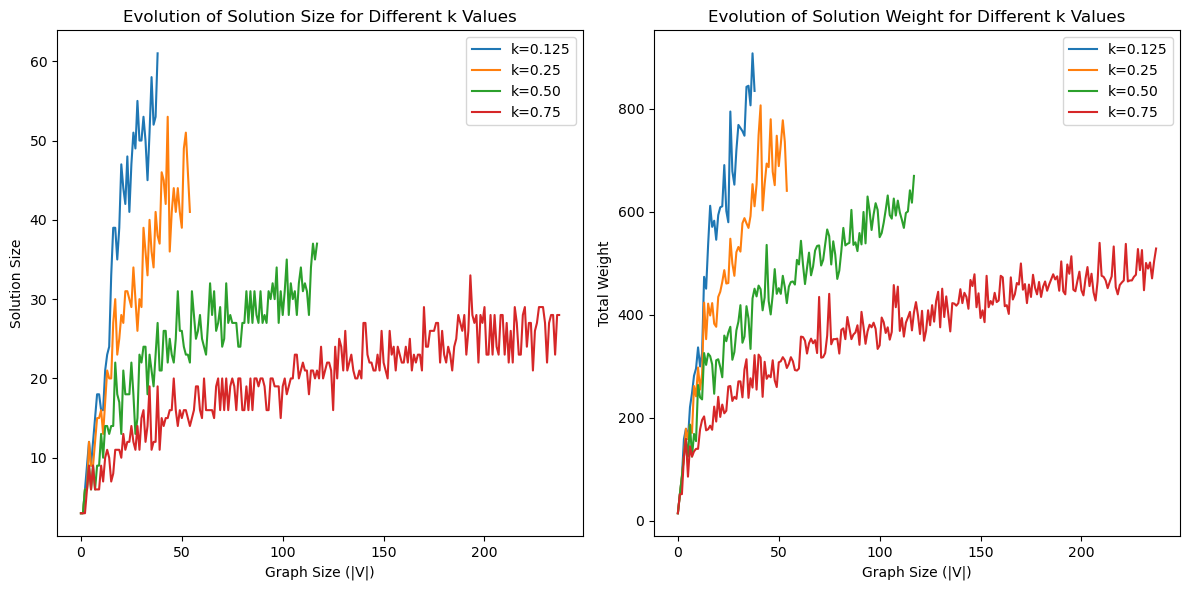

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df1 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_125.csv")
df2 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_25.csv")
df3 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_50.csv")
df4 = pd.read_csv("./stress_tests/exhaustive/exhaustive_p_75.csv")

# Calculate solution size
df1['Solution Size'] = df1['Solution'].apply(len)
df2['Solution Size'] = df2['Solution'].apply(len)
df3['Solution Size'] = df3['Solution'].apply(len)
df4['Solution Size'] = df4['Solution'].apply(len)

# Set up subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Solution Size
axes[0].plot(df1['Solution Size'], label='k=0.125')
axes[0].plot(df2['Solution Size'], label='k=0.25')
axes[0].plot(df3['Solution Size'], label='k=0.50')
axes[0].plot(df4['Solution Size'], label='k=0.75')
axes[0].set_xlabel('Graph Size (|V|)')
axes[0].set_ylabel('Solution Size')
axes[0].set_title('Evolution of Solution Size for Different k Values')
axes[0].legend()

# Plot Total Weight of Solution
axes[1].plot(df1['Total Weight'], label='k=0.125')
axes[1].plot(df2['Total Weight'], label='k=0.25')
axes[1].plot(df3['Total Weight'], label='k=0.50')
axes[1].plot(df4['Total Weight'], label='k=0.75')
axes[1].set_xlabel('Graph Size (|V|)')
axes[1].set_ylabel('Total Weight')
axes[1].set_title('Evolution of Solution Weight for Different k Values')
axes[1].legend()

# Show the plots
plt.tight_layout()

plt.savefig('./images/evolution_of_solution.png', dpi=300)
plt.show()

## Exhaustive VS Greedy - Solution Size and Weight

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata

# Define k values and file paths
k_values = [0.125, 0.25, 0.5, 0.75]
file_paths = {
    0.125: ["./stress_tests/exhaustive/exhaustive_p_125.csv",
            "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_125.csv",
            "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_125.csv",
            "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_125.csv"],
    0.25: ["./stress_tests/exhaustive/exhaustive_p_25.csv",
           "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_25.csv",
           "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_25.csv",
           "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_25.csv"],
    0.5: ["./stress_tests/exhaustive/exhaustive_p_50.csv",
          "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_50.csv",
          "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_50.csv",
          "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_50.csv"],
    0.75: ["./stress_tests/exhaustive/exhaustive_p_75.csv",
           "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_75.csv",
           "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_75.csv",
           "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_75.csv"]
}

# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20), constrained_layout=True)

# Loop over each k value
for idx, k in enumerate(k_values):
    # Load data for each algorithm
    df1 = pd.read_csv(file_paths[k][0])
    df2 = pd.read_csv(file_paths[k][1])
    df3 = pd.read_csv(file_paths[k][2])
    df4 = pd.read_csv(file_paths[k][3])

    space = 39 if k == 0.125 else 55 if k == 0.25 else 118 if k == 0.5 else 238

    # Calculate Solution Size and Total Weight for each dataframe
    df1['Solution Size'] = df1['Solution'].apply(len)
    df2['Solution Size'] = df2['Solution'].apply(len)
    df3['Solution Size'] = df3['Solution'].apply(len)
    df4['Solution Size'] = df4['Solution'].apply(len)

    # Plot Solution Size
    df2['Solution Size'].head(space).plot(ax=axes[idx, 0], label='WMax - Biggest Weight First', color='orange', alpha=0.65)
    df3['Solution Size'].head(space).plot(ax=axes[idx, 0], label='DMin - Smallest Degree First', color='green', alpha=0.65)
    df4['Solution Size'].head(space).plot(ax=axes[idx, 0], label='WDMix -Weight to Degree', color='purple', alpha=0.65)
    df1['Solution Size'].head(space).plot(ax=axes[idx, 0], label='Exhaustive', color='red', linewidth=2, zorder=10)

    # Set labels for Solution Size plot
    axes[idx, 0].set_xlabel('Graph Size (|V|)', fontsize=8)
    axes[idx, 0].set_ylabel('Solution Size', fontsize=8)
    axes[idx, 0].set_title(f'Solution Size for k={k}', fontsize=10)
    axes[idx, 0].legend(fontsize=7, loc='upper left')

    # Plot Total Weight
    df2['Total Weight'].head(space).plot(ax=axes[idx, 1], label='WMax - Biggest Weight First', color='orange', alpha=0.65)
    df3['Total Weight'].head(space).plot(ax=axes[idx, 1], label='DMin - Smallest Degree First', color='green', alpha=0.65)
    df4['Total Weight'].head(space).plot(ax=axes[idx, 1], label='WDMix - Weight to Degree', color='purple', alpha=0.65)
    df1['Total Weight'].head(space).plot(ax=axes[idx, 1], label='Exhaustive', color='red', linewidth=2, zorder=10)

    # Set labels for Total Weight plot
    axes[idx, 1].set_xlabel('Graph Size (|V|)', fontsize=8)
    axes[idx, 1].set_ylabel('Total Weight', fontsize=8)
    axes[idx, 1].set_title(f'Total Weight of Solution for k={k}', fontsize=10)
    axes[idx, 1].legend(fontsize=7, loc='upper left')
    
    size_ranks = np.zeros((4, space))
    weight_ranks = np.zeros((4, space))
    speed_ranks = np.zeros((4, space))

    # Calculate ranks per graph instance, handling ties
    for i in range(space):
        solution_sizes = [df1['Solution Size'][i], df2['Solution Size'][i], df3['Solution Size'][i], df4['Solution Size'][i]]
        solution_weights = [df1['Total Weight'][i], df2['Total Weight'][i], df3['Total Weight'][i], df4['Total Weight'][i]]
        solution_speeds = [df1['Execution Time (seconds)'][i], df2['Execution Time (seconds)'][i], df3['Execution Time (seconds)'][i], df4['Execution Time (seconds)'][i]]
        
        # Use rankdata with 'min' to rank from largest to smallest (1 is best, 4 is worst)
        size_ranks[:, i] = 5 - rankdata(solution_sizes, method='max')
        weight_ranks[:, i] = 5 - rankdata(solution_weights, method='max')
        speed_ranks[:, i] = rankdata(solution_speeds, method='min')
    
    # Calculate mean ranks across all graph sizes
    size_ranks = np.mean(size_ranks, axis=1)
    weight_ranks = np.mean(weight_ranks, axis=1)
    speed_ranks = np.mean(speed_ranks, axis=1)

    # Prepare ranking table data for current k
    ranking_data_k = {
           'Algorithm': ['Exhaustive', 'Biggest Weight First', 'Smallest Degree First', 'Weight to Degree'],
           'Solution Size Rank': np.round(size_ranks, 2),
           'Total Weight Rank': np.round(weight_ranks, 2),
           'Speed Rank': np.round(speed_ranks, 2),
           'Average Rank': np.round((size_ranks + weight_ranks + speed_ranks) / 3, 2)
    }
    ranking_df_k = pd.DataFrame(ranking_data_k).set_index('Algorithm')
    ranking_df_k = ranking_df_k.sort_values(by='Average Rank')

    # Save table data to CSV
    ranking_df_k.to_csv(f'./images/ranking_table_k_{k}.csv')

    # Plot and save the ranking table as an image
    fig_table, ax_table = plt.subplots(figsize=(6, 1.5))
    ax_table.axis('off')
    ax_table.table(cellText=ranking_df_k.values, colLabels=ranking_df_k.columns, rowLabels=ranking_df_k.index, cellLoc='center', loc='center')
    plt.savefig(f'./images/ranking_table_k_{k}.png', dpi=300)
    plt.close(fig_table)

# Save the main figure with all plots
plt.tight_layout(pad=1.0)
plt.savefig('./images/solution_size_weight_comparison_all.png', dpi=300)
plt.close()

Graph 0 - Solution Size Ranks: [1. 1. 1. 1.]
Graph 0 - Total Weight Ranks: [1. 1. 1. 1.]
Graph 0 - Execution Time Ranks: [1. 1. 1. 1.]
Graph 1 - Solution Size Ranks: [1. 1. 1. 1.]
Graph 1 - Total Weight Ranks: [1. 1. 4. 1.]
Graph 1 - Execution Time Ranks: [1. 1. 1. 1.]
Graph 2 - Solution Size Ranks: [1. 1. 1. 1.]
Graph 2 - Total Weight Ranks: [1. 1. 4. 1.]
Graph 2 - Execution Time Ranks: [1. 1. 1. 1.]
Graph 3 - Solution Size Ranks: [1. 1. 1. 1.]
Graph 3 - Total Weight Ranks: [1. 1. 4. 1.]
Graph 3 - Execution Time Ranks: [1. 1. 1. 1.]
Graph 4 - Solution Size Ranks: [1. 1. 1. 1.]
Graph 4 - Total Weight Ranks: [1. 1. 4. 1.]
Graph 4 - Execution Time Ranks: [1. 1. 1. 1.]
Graph 5 - Solution Size Ranks: [2. 2. 1. 2.]
Graph 5 - Total Weight Ranks: [1. 1. 4. 1.]
Graph 5 - Execution Time Ranks: [1. 1. 1. 1.]
Graph 6 - Solution Size Ranks: [1. 1. 1. 1.]
Graph 6 - Total Weight Ranks: [1. 1. 4. 3.]
Graph 6 - Execution Time Ranks: [1. 1. 1. 1.]
Graph 7 - Solution Size Ranks: [2. 2. 1. 2.]
Graph 7 - 

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_17720\2846382610.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0)


## Exhaustive VS Greedy - Error Ratio

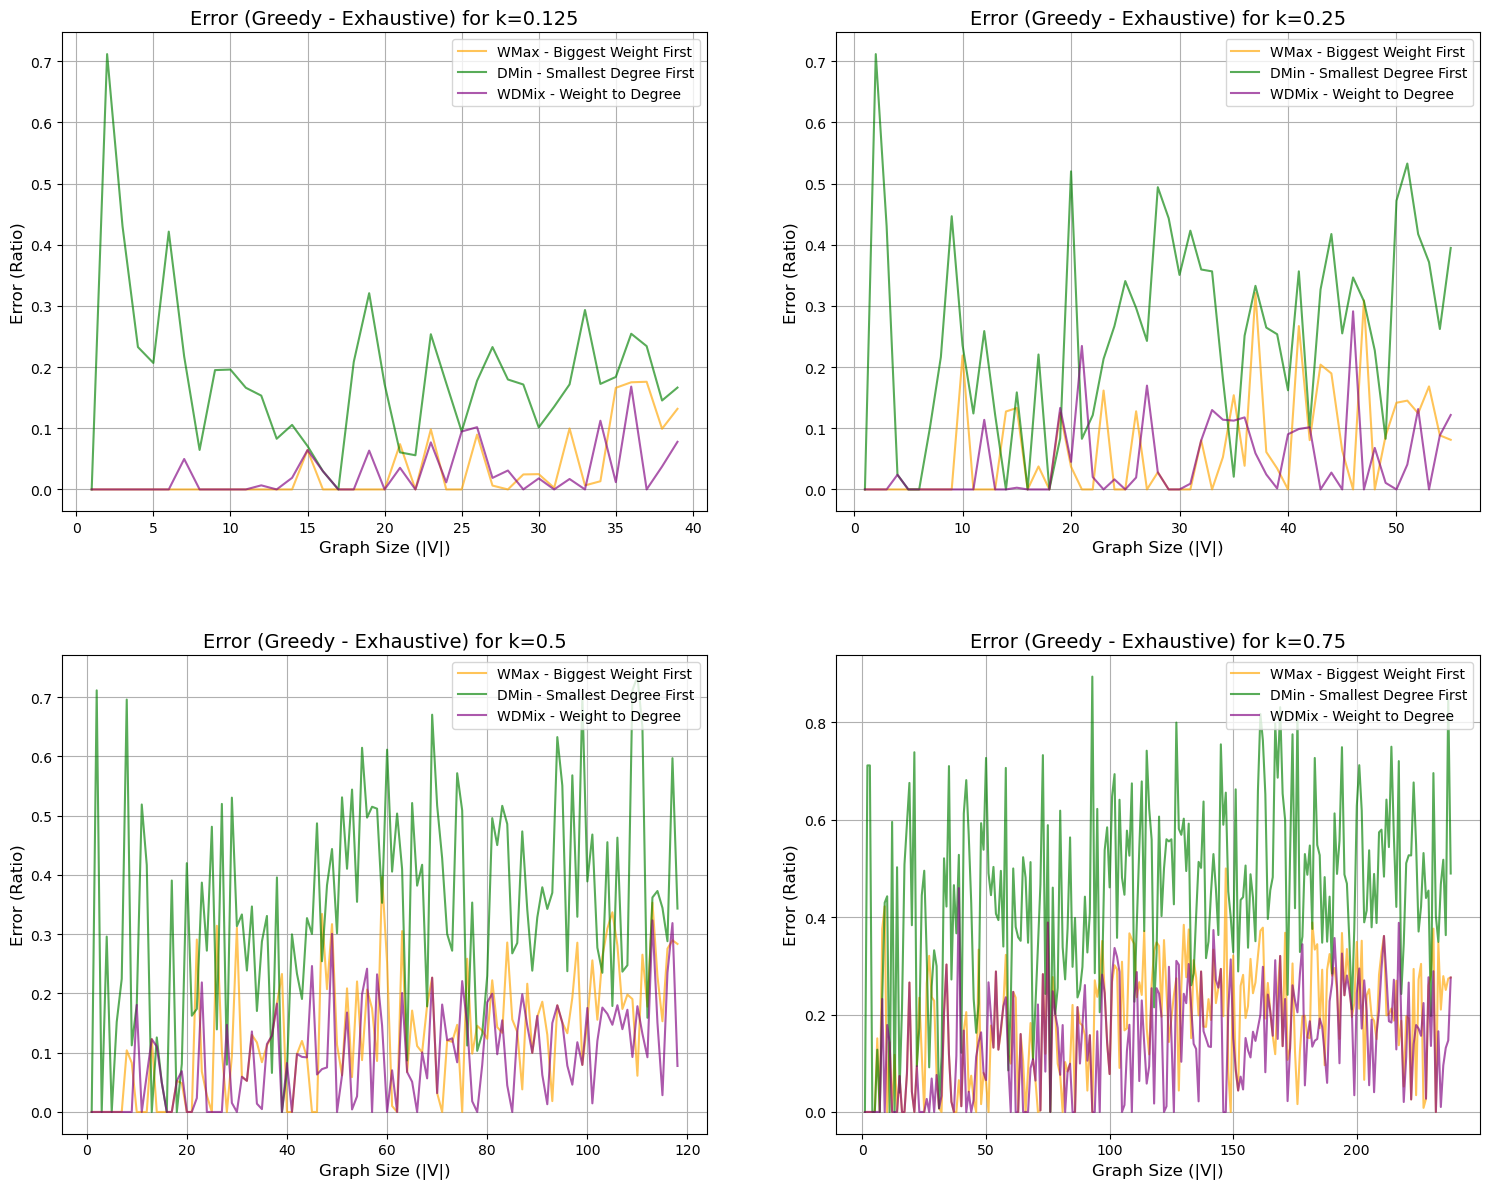

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define k values and file paths
k_values = [0.125, 0.25, 0.5, 0.75]
file_paths = {
    0.125: ["./stress_tests/exhaustive/exhaustive_p_125.csv",
            "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_125.csv",
            "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_125.csv",
            "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_125.csv"],
    0.25: ["./stress_tests/exhaustive/exhaustive_p_25.csv",
           "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_25.csv",
           "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_25.csv",
           "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_25.csv"],
    0.5: ["./stress_tests/exhaustive/exhaustive_p_50.csv",
          "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_50.csv",
          "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_50.csv",
          "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_50.csv"],
    0.75: ["./stress_tests/exhaustive/exhaustive_p_75.csv",
           "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_75.csv",
           "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_75.csv",
           "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_75.csv"]
}

# Initialize the plot grid (2x2 layout)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Define the colors for each algorithm
algorithm_colors = {
    'WMax - Biggest Weight First': 'orange',
    'DMin - Smallest Degree First': 'green',
    'WDMix - Weight to Degree': 'purple'
}

# Iterate through each k value
for idx, (k, paths) in enumerate(file_paths.items()):
    # Load the CSV files for each algorithm
    df_exhaustive = pd.read_csv(paths[0])
    df_biggest_weight_first = pd.read_csv(paths[1])
    df_smallest_degree_first = pd.read_csv(paths[2])
    df_weight_to_degree = pd.read_csv(paths[3])
    
    # Limit heuristic algorithms to the same solution count as the exhaustive algorithm
    solution_count = len(df_exhaustive)  # Get the solution count for exhaustive
    df_exhaustive = df_exhaustive.head(solution_count)
    df_biggest_weight_first = df_biggest_weight_first.head(solution_count)
    df_smallest_degree_first = df_smallest_degree_first.head(solution_count)
    df_weight_to_degree = df_weight_to_degree.head(solution_count)
    
    # Structure data in a dictionary for the heuristics
    algorithms = {
        'WMax - Biggest Weight First': df_biggest_weight_first,
        'DMin - Smallest Degree First': df_smallest_degree_first,
        'WDMix - Weight to Degree': df_weight_to_degree
    }

    # Plot error (the difference between greedy and exhaustive solution weight)
    for name, df in algorithms.items():
        # Calculate error as the difference between exhaustive and greedy solution weight, normalized by exhaustive weight
        error = (df_exhaustive['Total Weight'].values - df['Total Weight'].values) / df_exhaustive['Total Weight'].values
        
        # Plot with the respective color and label
        axs[idx].plot(df_exhaustive['Node Count'], error, label=name, color=algorithm_colors[name], alpha=0.65)

    # Set plot labels and title
    axs[idx].set_xlabel('Graph Size (|V|)', fontsize=12)
    axs[idx].set_ylabel('Error (Ratio)', fontsize=12)
    axs[idx].set_title(f'Error (Greedy - Exhaustive) for k={k}', fontsize=14)
    axs[idx].legend(loc='upper right', fontsize=10)

    # Set the grid for better readability
    axs[idx].grid(True)

# Adjust layout for the 2x2 grid
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # Adjust horizontal and vertical space

# Save or show the plot
plt.savefig('./images/error_grid_2x2.png', dpi=300)
plt.show()


## Exhaustive VS Greedy - Deviation

In [1]:
import pandas as pd
import numpy as np
from utils import utils  # Assuming your custom function is in this module

# Define k values and file paths
k_values = [0.125, 0.25, 0.5, 0.75]
file_paths = {
    0.125: ["./stress_tests/exhaustive/exhaustive_p_125.csv",
            "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_125.csv",
            "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_125.csv",
            "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_125.csv"],
    0.25: ["./stress_tests/exhaustive/exhaustive_p_25.csv",
           "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_25.csv",
           "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_25.csv",
           "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_25.csv"],
    0.5: ["./stress_tests/exhaustive/exhaustive_p_50.csv",
          "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_50.csv",
          "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_50.csv",
          "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_50.csv"],
    0.75: ["./stress_tests/exhaustive/exhaustive_p_75.csv",
           "./stress_tests/biggest_weight_first_compare/biggest_weight_first_compare_p_75.csv",
           "./stress_tests/smallest_degree_first_compare/smallest_degree_first_compare_p_75.csv",
           "./stress_tests/weight_to_degree_compare/weight_to_degree_compare_p_75.csv"]
}

# Dictionary to store the results for each k
accuracy_precision_results = {}

# Loop over each k value
for k in k_values:
    # Load data for each algorithm
    df_exhaustive = pd.read_csv(file_paths[k][0])
    df_biggest_weight_first = pd.read_csv(file_paths[k][1])
    df_smallest_degree_first = pd.read_csv(file_paths[k][2])
    df_weight_to_degree = pd.read_csv(file_paths[k][3])
    
    # Limit heuristic algorithms to the same solution count as the exhaustive algorithm
    solution_count = len(df_exhaustive)  # Get the solution count for exhaustive
    df_biggest_weight_first = df_biggest_weight_first.head(solution_count)
    df_smallest_degree_first = df_smallest_degree_first.head(solution_count)
    df_weight_to_degree = df_weight_to_degree.head(solution_count)
    
    # Create a dictionary of the heuristic algorithms
    algorithms = {
        'Biggest Weight First': df_biggest_weight_first,
        'Smallest Degree First': df_smallest_degree_first,
        'Weight to Degree': df_weight_to_degree
    }
    
    # Calculate accuracy and precision for solution weight
    accuracy_precision_df_weight = utils.calculate_accuracy_precision(df_exhaustive, algorithms, metric='Total Weight')
    accuracy_precision_df_weight['k'] = k  # Add k value for identification
    
    # Store the resulting DataFrame in the dictionary
    accuracy_precision_results[k] = accuracy_precision_df_weight

# Concatenate results for all k values into a single DataFrame
final_accuracy_precision_df = pd.concat(accuracy_precision_results.values(), ignore_index=True)

# Save to CSV
final_accuracy_precision_df.to_csv('./images/accuracy_precision_summary.csv', index=False)


## Greedy Algorithm - Time and Operations

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# Read data for all graph sizes for the three algorithms
df_biggest_weight_first_125 = pd.read_csv("./stress_tests/biggest_weight_first/biggest_weight_first_p_125.csv")
df_biggest_weight_first_25 = pd.read_csv("./stress_tests/biggest_weight_first/biggest_weight_first_p_25.csv")
df_biggest_weight_first_50 = pd.read_csv("./stress_tests/biggest_weight_first/biggest_weight_first_p_50.csv")
df_biggest_weight_first_75 = pd.read_csv("./stress_tests/biggest_weight_first/biggest_weight_first_p_75.csv")

df_smallest_degree_first_125 = pd.read_csv("./stress_tests/smallest_degree_first/smallest_degree_first_p_125.csv")
df_smallest_degree_first_25 = pd.read_csv("./stress_tests/smallest_degree_first/smallest_degree_first_p_25.csv")
df_smallest_degree_first_50 = pd.read_csv("./stress_tests/smallest_degree_first/smallest_degree_first_p_50.csv")
df_smallest_degree_first_75 = pd.read_csv("./stress_tests/smallest_degree_first/smallest_degree_first_p_75.csv")

df_weight_to_degree_125 = pd.read_csv("./stress_tests/weight_to_degree/weight_to_degree_p_125.csv")
df_weight_to_degree_25 = pd.read_csv("./stress_tests/weight_to_degree/weight_to_degree_p_25.csv")
df_weight_to_degree_50 = pd.read_csv("./stress_tests/weight_to_degree/weight_to_degree_p_50.csv")
df_weight_to_degree_75 = pd.read_csv("./stress_tests/weight_to_degree/weight_to_degree_p_75.csv")

# Store data for each algorithm
df_biggest_weight_first = {
    125: df_biggest_weight_first_125,
    25: df_biggest_weight_first_25,
    50: df_biggest_weight_first_50,
    75: df_biggest_weight_first_75
}

df_smallest_degree_first = {
    125: df_smallest_degree_first_125,
    25: df_smallest_degree_first_25,
    50: df_smallest_degree_first_50,
    75: df_smallest_degree_first_75
}

df_weight_to_degree = {
    125: df_weight_to_degree_125,
    25: df_weight_to_degree_25,
    50: df_weight_to_degree_50,
    75: df_weight_to_degree_75
}

k_values = [125, 25, 50, 75]  # Use actual values

# Extract data for time and number of operations by graph size and k
def extract_data(df_dict, k_values, column_name):
    return {k: df_dict[k][column_name] for k in k_values}

biggest_weight_first_ops = extract_data(df_biggest_weight_first, k_values, 'Number of Operations')
smallest_degree_first_ops = extract_data(df_smallest_degree_first, k_values, 'Number of Operations')
weight_to_degree_ops = extract_data(df_weight_to_degree, k_values, 'Number of Operations')

# Extract Execution Time data (Assuming there's a 'Execution Time' column in the CSVs)
biggest_weight_first_time = extract_data(df_biggest_weight_first, k_values, 'Execution Time (seconds)')
smallest_degree_first_time = extract_data(df_smallest_degree_first, k_values, 'Execution Time (seconds)')
weight_to_degree_time = extract_data(df_weight_to_degree, k_values, 'Execution Time (seconds)')

# Function to calculate the mean with available data
def calculate_mean(ops_dict, graph_size):
    values = [ops[graph_size] for ops in ops_dict.values() if graph_size < len(ops)]
    return np.mean(values) if values else np.nan

# Calculate the average number of operations and execution time for each graph size across the k values
def calculate_avg_data(ops_dict, time_dict):
    max_graph_size = max(len(ops) for ops in ops_dict.values())
    avg_ops = [calculate_mean(ops_dict, i) for i in range(max_graph_size)]
    avg_time = [calculate_mean(time_dict, i) for i in range(max_graph_size)]
    return avg_ops, avg_time

avg_biggest_weight_first_ops, avg_biggest_weight_first_time = calculate_avg_data(biggest_weight_first_ops, biggest_weight_first_time)
avg_smallest_degree_first_ops, avg_smallest_degree_first_time = calculate_avg_data(smallest_degree_first_ops, smallest_degree_first_time)
avg_weight_to_degree_ops, avg_weight_to_degree_time = calculate_avg_data(weight_to_degree_ops, weight_to_degree_time)

# Plotting both graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Colors for distinguishing lines
colors = matplotlib.colormaps["tab10"]  # Use the updated method for color mapping

scale = 100

# Plot 1: Number of Operations
axes[0].plot([100 +x * scale for x in range(len(avg_biggest_weight_first_ops))], avg_biggest_weight_first_ops, color=colors(1), linewidth=1.5, label='Biggest Weight First')
axes[0].plot([100 +x * scale for x in range(len(avg_smallest_degree_first_ops))], avg_smallest_degree_first_ops, color=colors(2), linewidth=1.5, label='Smallest Degree First')
axes[0].plot([100 +x * scale for x in range(len(avg_weight_to_degree_ops))], avg_weight_to_degree_ops, color=colors(4), linewidth=1.5, label='Weight to Degree')

axes[0].set_xlabel('Graph Size (|V|)')
axes[0].set_ylabel('Number of Operations')
axes[0].set_title('Average Number of Operations by Graph Size (for k in [12.5, 25, 50, 75])')
axes[0].legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize='small')

# Plot 2: Execution Time
axes[1].plot([100 +x * scale for x in range(len(avg_biggest_weight_first_time))], avg_biggest_weight_first_time, color=colors(1), linewidth=1.5, label='Biggest Weight First')
axes[1].plot([100 +x * scale for x in range(len(avg_smallest_degree_first_time))], avg_smallest_degree_first_time, color=colors(2), linewidth=1.5, label='Smallest Degree First')
axes[1].plot([100 +x * scale for x in range(len(avg_weight_to_degree_time))], avg_weight_to_degree_time, color=colors(4), linewidth=1.5, label='Weight to Degree')

axes[1].set_xlabel('Graph Size (|V|)')
axes[1].set_ylabel('Execution Time (s)')
axes[1].set_title('Average Execution Time by Graph Size (for k in [12.5, 25, 50, 75])')
axes[1].legend(loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize='small')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('./images/greedy_comparison_time_and_operations.png', dpi=300)
plt.close()


In [1]:
from algorithms import algorithms

# Determine the precision of the biggest_weight_first_v2 algorithm
#print("Heuristic: Biggest Weight First V2")
#precision = algorithms.compare_precision(algorithms.biggest_weight_first_v2, 0.75, 110)
#print("Precision:", precision)
#print()
#
## Determine the precision of the smallest_degree_first_v1 algorithm
#print("Heuristic: Smallest Degree First V1")
#precision = algorithms.compare_precision(algorithms.smallest_degree_first_v1, 0.75, 110)
#print("Precision:", precision)
#print()
#
# Determine the precision of the weight_to_degree_v1 algorithm
print("Heuristic: Weight to Degree V1")
precision = algorithms.compare_precision(algorithms.weight_to_degree_v1, 0.75, 110)
print("Precision:", precision)
print()

# Determine the precision of the weight_to_degree_with_randomness algorithm
print("Heuristic: Weight to Degree with Randomness")
precision = algorithms.compare_precision(algorithms.weight_to_degree_with_randomness, 0.75, 110)
print("Precision:", precision)
print()

# Determine the precision of the completely_random algorithm
print("Heuristic: Completely Random")
precision = algorithms.compare_precision(algorithms.completely_random, 0.75, 110)
print("Precision:", precision)
print()

# Determine the precision of the randomized_maximum_weight_independent_set algorithm
print("Heuristic: Randomized Maximum Weight Independent Set")
precision = algorithms.compare_precision(algorithms.randomized_maximum_weight_independent_set, 0.75, 110)
print("Precision:", precision)
print()


Heuristic: Weight to Degree V1


Testing graphs: 100%|██████████| 110/110 [00:24<00:00,  4.58graph/s]


Total time taken: 24.11 seconds
Precision: 33.63636363636363

Heuristic: Weight to Degree with Randomness


Testing graphs: 100%|██████████| 110/110 [00:23<00:00,  4.61graph/s]


Total time taken: 23.86 seconds
Precision: 10.909090909090908

Heuristic: Completely Random


Testing graphs: 100%|██████████| 110/110 [00:24<00:00,  4.52graph/s]


Total time taken: 24.36 seconds
Precision: 5.454545454545454

Heuristic: Randomized Maximum Weight Independent Set


Testing graphs: 100%|██████████| 110/110 [00:30<00:00,  3.66graph/s]

Total time taken: 30.03 seconds
Precision: 92.72727272727272



In [ ]:
from algorithms import algorithms

# Determine the precision of the article_greedy algorithm
print("Heuristic: Article Greedy")
precision = algorithms.compare_precision(algorithms.article_greedy, 0.75, 150)
print("Precision:", precision)
print()

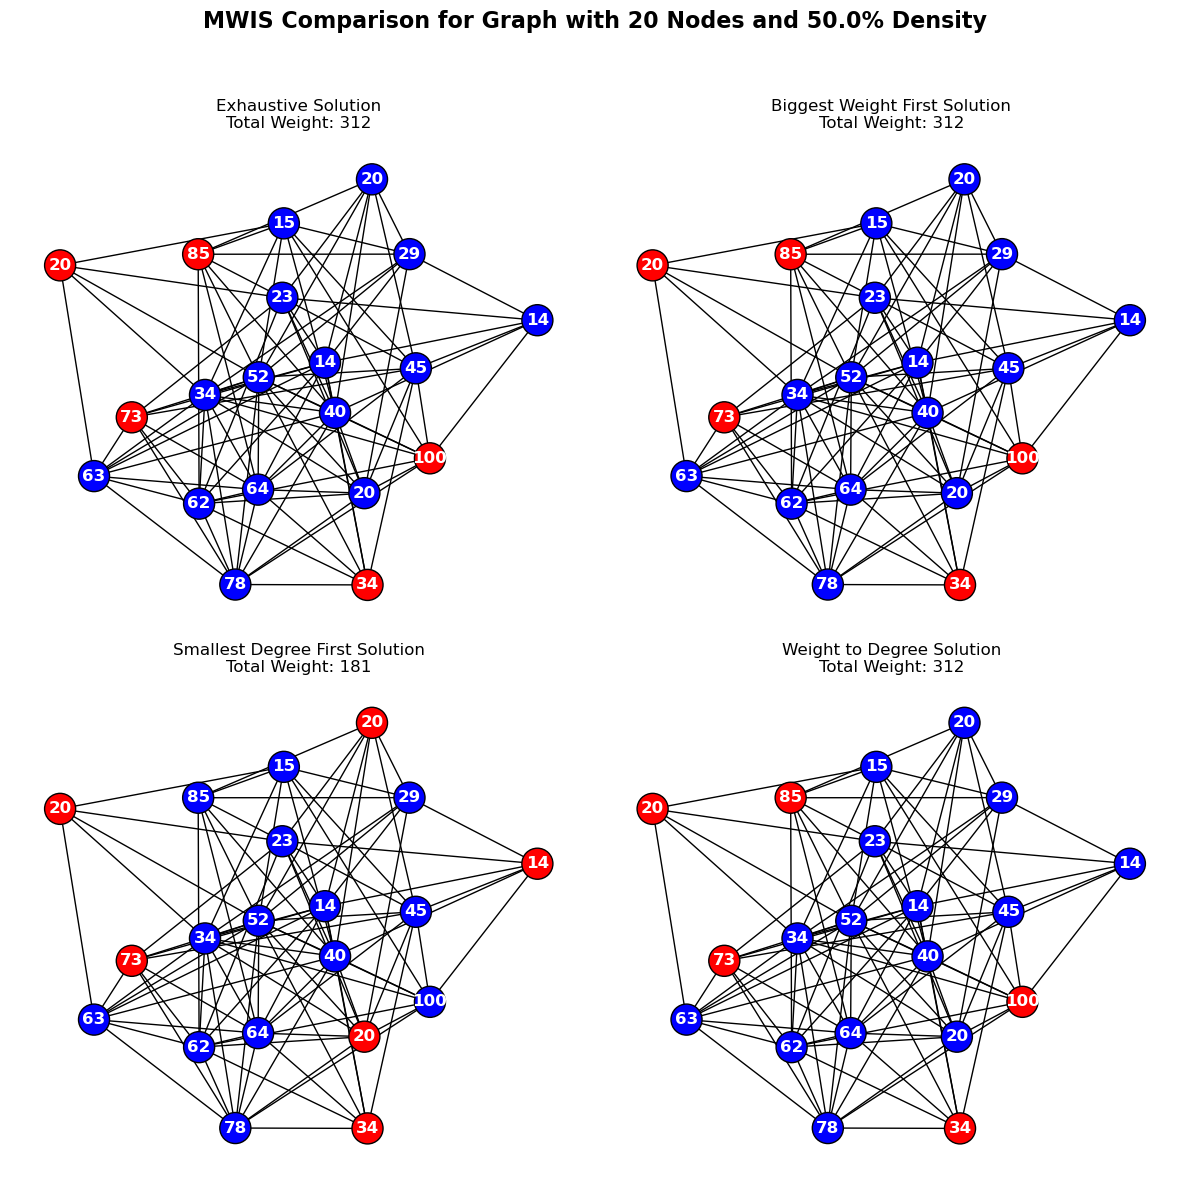

In [2]:
# Visualize one of the graphs and the solutions found by the algorithms
from utils import utils
from algorithms import algorithms

algorithms_sets = {}

k = 0.5
test_graph = utils.create_graph_v4(20, k)

algorithms_sets['Exhaustive'], _ = algorithms.exhaustive_v2(test_graph)
algorithms_sets['Biggest Weight First'], _ = algorithms.biggest_weight_first_v2(test_graph)
algorithms_sets['Smallest Degree First'], _ = algorithms.smallest_degree_first_v1(test_graph)
algorithms_sets['Weight to Degree'], _ = algorithms.weight_to_degree_v1(test_graph)

utils.visual_compare_algorithms(test_graph, algorithms_sets, k=k, store_png=True)